<a href="https://colab.research.google.com/github/vvvipindsm/Interview/blob/master/playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
!pip install yfinance
!pip install numpy

import numpy as np

import matplotlib.pyplot as plt
import warnings
import yfinance

warnings.filterwarnings('ignore')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
nifty_raw_data = yfinance.download (tickers = "^NSEI ^GSPC", start = "2008-01-08", 
                              end = "2022-06-27", interval = "1d", group_by = 'ticker', auto_adjust = True, treads = True)
stocks_raw_data = yfinance.download (tickers = "FEDERALBNK.NS", start = "2008-01-08", 
                              end = "2022-06-27", interval = "1d", group_by = 'ticker', auto_adjust = True, treads = True)

stocks_raw_data.head()

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-08,28.112008,28.112008,26.653749,27.038567,5343770
2008-01-09,26.977806,27.949979,26.329691,27.366674,5576690
2008-01-10,27.544909,28.598096,27.544909,27.873016,10035660
2008-01-11,27.787950,28.148464,27.228952,27.828457,4510450
2008-01-14,28.026943,28.274037,27.605667,27.751493,4738180


In [ ]:
df_comp = nifty_raw_data.copy()
df_stock = stocks_raw_data.copy()
df_comp['nifty'] = df_comp['^NSEI'].Close[:]
df_comp['kpi'] = df_stock.Close[:]


df_comp['Qkpi'] = df_stock.Volume[:]
df_comp['spx'] = df_comp['^GSPC'].Close[:]
df_comp = df_comp.iloc[1:]
del df_comp['^GSPC']
del df_comp['^NSEI']

df_stock=df_stock.asfreq('b')
df_stock=df_stock.fillna(method='ffill')

df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')
df_comp = df_comp[-len(df_stock):]


  

In [ ]:
#spa
df_comp['ret_spx'] = df_comp.spx.pct_change(1).mul(100)
df_comp['norm_ret_spx'] = df_comp.ret_spx.div(df_comp.ret_spx[1])*100


df_comp['ret_nifty'] = df_comp.nifty.pct_change(1).mul(100)
df_comp['norm_ret_nifty'] = df_comp.ret_nifty.div(df_comp.ret_nifty[1])*100

# # kpi
df_comp['ret_kpi'] = df_comp.kpi.pct_change(1).mul(100)
df_comp['norm_ret_kpi'] = df_comp.ret_kpi.div(df_comp.ret_kpi[1])*100

# # kpi volumn
df_comp['ret_Qkpi'] = df_comp.Qkpi.pct_change(1).mul(100)
df_comp['norm_ret_Qkpi'] = pd.DataFrame(df_comp.ret_Qkpi.div(df_comp.ret_Qkpi[1])*100)



In [ ]:


#divide into train and validation set

size = int(len(df_comp)*0.8)
train, valid = df_comp.iloc[:size], df_comp.iloc[size:]
# train = df_comp
# train.head()

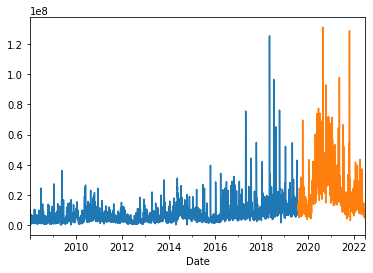

Date
2008-01-09     5576690.0
2008-01-10    10035660.0
2008-01-11     4510450.0
2008-01-14     4738180.0
2008-01-15     6372480.0
Freq: B, Name: Qkpi, dtype: float64

In [90]:
# plotting the data
train['Qkpi'].plot()
valid['Qkpi'].plot()
plt.show()
# print(np.any(np.isnan(train['ret_Qkpi'])))
# print(np.all(np.isfinite(train['ret_Qkpi'])))
# print(train['ret_kpi'])


train['Qkpi'].head()

In [ ]:
#building the model
!pip install pmdarima
from pmdarima.arima import auto_arima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [95]:
para_index =1
# old modal
# 'ret_nifty','ret_spx'
model = auto_arima(train.ret_kpi[para_index:],exogenous = train[['Qkpi','ret_nifty','ret_spx']][para_index:], 
                    m = 5, max_p = 5, max_q = 5, max_P = 5, max_Q = 5)
# model.fit(train.ret_ftse[para_index:])



In [96]:
start_date = "2021-01-23"
# ^CNXENERGY
end_date = "2022-05-23"
df_auto_pred = pd.DataFrame(model.predict(n_periods = len(valid[start_date:end_date]),
                            exogenous = valid[['Qkpi','ret_nifty','ret_spx']][start_date:end_date]),
                            index = valid[start_date:end_date].index)

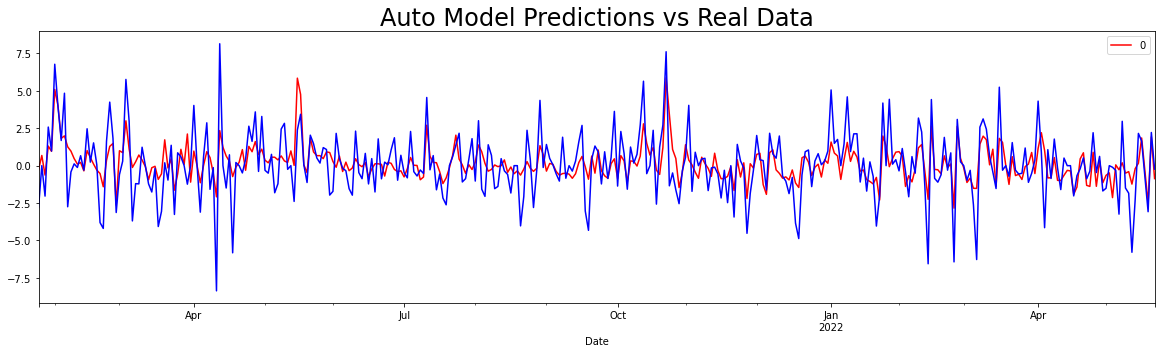

In [97]:


df_auto_pred.plot(figsize = (20,5), color = "red")
valid.ret_kpi[start_date:end_date].plot(color = "blue")
plt.title("Auto Model Predictions vs Real Data", size = 24)
plt.show()